### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_excel(r"C:\Users\Anitha\Desktop\New_Interviewee_Case_Study_Dataset_FINAL__282_29.xlsx")

In [3]:
df1.head(5)

,Age,Gender,MonthlyIncome,Department,NumCompaniesWorked,Over18,workingfromhome,BusinessTravel,DistanceFromHome,StandardHours,JobSatisfaction,complaintfiled,complaintresolved,complaintyears,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
0,31,Female,low,Research & Development,1,Y,0,Travel_Rarely,2,40,4,1,Y,0.0,11,1,1,1,0,No
1,32,Male,low,Research & Development,0,Y,0,Travel_Frequently,2,40,4,0,NaN,NaN,13,2,8,7,3,No
2,34,Female,medium,Research & Development,3,Y,1,Travel_Rarely,8,40,1,0,NaN,NaN,14,3,7,0,0,No
3,49,Male,high,Research & Development,4,Y,0,Travel_Rarely,1,40,3,0,NaN,NaN,14,3,23,8,0,No
4,27,Male,medium,Research & Development,1,Y,0,Travel_Rarely,19,40,1,0,NaN,NaN,11,1,7,7,0,No


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1474 non-null   int64  
 1   Gender                   1474 non-null   object 
 2   MonthlyIncome            1474 non-null   object 
 3   Department               1474 non-null   object 
 4   NumCompaniesWorked       1474 non-null   int64  
 5   Over18                   1474 non-null   object 
 6   workingfromhome          1474 non-null   int64  
 7   BusinessTravel           1474 non-null   object 
 8   DistanceFromHome         1474 non-null   int64  
 9   StandardHours            1474 non-null   int64  
 10  JobSatisfaction          1474 non-null   int64  
 11  complaintfiled           1474 non-null   int64  
 12  complaintresolved        294 non-null    object 
 13  complaintyears           263 non-null    float64
 14  PercentSalaryHike       

### Data Cleaning and Data Exploration

In [5]:
df1 = df1.drop(['Over18','StandardHours'] , axis = 1)
df1.head()

,Age,Gender,MonthlyIncome,Department,NumCompaniesWorked,workingfromhome,BusinessTravel,DistanceFromHome,JobSatisfaction,complaintfiled,complaintresolved,complaintyears,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
0,31,Female,low,Research & Development,1,0,Travel_Rarely,2,4,1,Y,0.0,11,1,1,1,0,No
1,32,Male,low,Research & Development,0,0,Travel_Frequently,2,4,0,NaN,NaN,13,2,8,7,3,No
2,34,Female,medium,Research & Development,3,1,Travel_Rarely,8,1,0,NaN,NaN,14,3,7,0,0,No
3,49,Male,high,Research & Development,4,0,Travel_Rarely,1,3,0,NaN,NaN,14,3,23,8,0,No
4,27,Male,medium,Research & Development,1,0,Travel_Rarely,19,1,0,NaN,NaN,11,1,7,7,0,No


In [6]:
df1.describe()

,Age,NumCompaniesWorked,workingfromhome,DistanceFromHome,JobSatisfaction,complaintfiled,complaintyears,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion
count,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000,263.000000,1474.000000,1474.000000,1474.000000,1474.000000,1474.000000
mean,36.945047,2.695387,0.456581,9.200136,2.731343,0.199457,1.106464,15.204885,2.871099,11.291045,7.008820,2.190638
std,9.153312,2.501083,0.498280,8.115843,1.102861,0.399728,1.020812,3.656512,1.399134,7.785923,6.120918,3.221768
min,18.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,12.000000,2.000000,6.000000,3.000000,0.000000
50%,36.000000,2.000000,0.000000,7.000000,3.000000,0.000000,1.000000,14.000000,3.000000,10.000000,5.000000,1.000000
75%,43.000000,4.000000,1.000000,14.000000,4.000000,0.000000,2.000000,18.000000,4.000000,15.000000,9.000000,3.000000
max,60.000000,9.000000,1.000000,29.000000,4.000000,1.000000,4.000000,25.000000,5.000000,40.000000,40.000000,15.000000


In [7]:
df1.shape

(1474, 18)

In [8]:
df1.isnull().sum()

Age                           0
Gender                        0
MonthlyIncome                 0
Department                    0
NumCompaniesWorked            0
workingfromhome               0
BusinessTravel                0
DistanceFromHome              0
JobSatisfaction               0
complaintfiled                0
complaintresolved          1180
complaintyears             1211
PercentSalaryHike             0
PerformanceRating             0
TotalWorkingYears             0
YearsAtCompany                0
YearsSinceLastPromotion       0
Left                          0
dtype: int64

In [9]:
df1.dropna(axis=1,inplace=True)

In [10]:
df1.shape

(1474, 16)

In [11]:
df1.isnull().sum()

Age                        0
Gender                     0
MonthlyIncome              0
Department                 0
NumCompaniesWorked         0
workingfromhome            0
BusinessTravel             0
DistanceFromHome           0
JobSatisfaction            0
complaintfiled             0
PercentSalaryHike          0
PerformanceRating          0
TotalWorkingYears          0
YearsAtCompany             0
YearsSinceLastPromotion    0
Left                       0
dtype: int64

In [12]:
Department_Count = pd.DataFrame(df1['Department'].value_counts())
Department_Count

,Department
Research & Development,963
Sales,447
Human Resources,64


In [13]:
Gen= pd.get_dummies(df1['Gender'])

In [14]:
income= pd.get_dummies(df1['MonthlyIncome'])

In [15]:
travel= pd.get_dummies(df1['BusinessTravel'])

In [16]:
department= pd.get_dummies(df1['Department'])

In [17]:
le = preprocessing.LabelEncoder()
df1['Left'] = le.fit_transform(df1['Left'])

In [18]:
df1.head(3)

,Age,Gender,MonthlyIncome,Department,NumCompaniesWorked,workingfromhome,BusinessTravel,DistanceFromHome,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,Left
0,31,Female,low,Research & Development,1,0,Travel_Rarely,2,4,1,11,1,1,1,0,0
1,32,Male,low,Research & Development,0,0,Travel_Frequently,2,4,0,13,2,8,7,3,0
2,34,Female,medium,Research & Development,3,1,Travel_Rarely,8,1,0,14,3,7,0,0,0


In [19]:
df = pd.concat([df1,Gen,income,travel,department], axis = 1)

In [20]:
df.head()

,Age,Gender,MonthlyIncome,Department,NumCompaniesWorked,workingfromhome,BusinessTravel,DistanceFromHome,JobSatisfaction,complaintfiled,...,Male,high,low,medium,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales
0,31,Female,low,Research & Development,1,0,Travel_Rarely,2,4,1,...,0,0,1,0,0,0,1,0,1,0
1,32,Male,low,Research & Development,0,0,Travel_Frequently,2,4,0,...,1,0,1,0,0,1,0,0,1,0
2,34,Female,medium,Research & Development,3,1,Travel_Rarely,8,1,0,...,0,0,0,1,0,0,1,0,1,0
3,49,Male,high,Research & Development,4,0,Travel_Rarely,1,3,0,...,1,1,0,0,0,0,1,0,1,0
4,27,Male,medium,Research & Development,1,0,Travel_Rarely,19,1,0,...,1,0,0,1,0,0,1,0,1,0


In [21]:
df.drop(['Gender','MonthlyIncome','Department','BusinessTravel'],axis=1,inplace=True)

In [22]:
df.head()

,Age,NumCompaniesWorked,workingfromhome,DistanceFromHome,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,...,Male,high,low,medium,Non-Travel,Travel_Frequently,Travel_Rarely,Human Resources,Research & Development,Sales
0,31,1,0,2,4,1,11,1,1,1,...,0,0,1,0,0,0,1,0,1,0
1,32,0,0,2,4,0,13,2,8,7,...,1,0,1,0,0,1,0,0,1,0
2,34,3,1,8,1,0,14,3,7,0,...,0,0,0,1,0,0,1,0,1,0
3,49,4,0,1,3,0,14,3,23,8,...,1,1,0,0,0,0,1,0,1,0
4,27,1,0,19,1,0,11,1,7,7,...,1,0,0,1,0,0,1,0,1,0


In [23]:
df.rename(columns={'low':'MonthlyIncome_Low','medium':'MonthlyIncome_Medium','high':'MonthlyIncome_High',
                   'Non-Travel':'BusinessTravel_NonTravel',
                  'Travel_Frequently':'BusinessTravel_Travel_Frequently',
                   'Travel_Rarely':'BusinessTravel_Rarely',
                  'Human Resources':'Department_Human Resources',
                   'Research & Development':'Department_Research & Development',
                  'Sales':'Department_Sales'},inplace=True)

In [24]:
df.columns

Index(['Age', 'NumCompaniesWorked', 'workingfromhome', 'DistanceFromHome',
       'JobSatisfaction', 'complaintfiled', 'PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'Left', 'Female', 'Male',
       'MonthlyIncome_High', 'MonthlyIncome_Low', 'MonthlyIncome_Medium',
       'BusinessTravel_NonTravel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales'],
      dtype='object')

In [25]:
df.head()

,Age,NumCompaniesWorked,workingfromhome,DistanceFromHome,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,...,Male,MonthlyIncome_High,MonthlyIncome_Low,MonthlyIncome_Medium,BusinessTravel_NonTravel,BusinessTravel_Travel_Frequently,BusinessTravel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales
0,31,1,0,2,4,1,11,1,1,1,...,0,0,1,0,0,0,1,0,1,0
1,32,0,0,2,4,0,13,2,8,7,...,1,0,1,0,0,1,0,0,1,0
2,34,3,1,8,1,0,14,3,7,0,...,0,0,0,1,0,0,1,0,1,0
3,49,4,0,1,3,0,14,3,23,8,...,1,1,0,0,0,0,1,0,1,0
4,27,1,0,19,1,0,11,1,7,7,...,1,0,0,1,0,0,1,0,1,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1474 non-null   int64
 1   NumCompaniesWorked                 1474 non-null   int64
 2   workingfromhome                    1474 non-null   int64
 3   DistanceFromHome                   1474 non-null   int64
 4   JobSatisfaction                    1474 non-null   int64
 5   complaintfiled                     1474 non-null   int64
 6   PercentSalaryHike                  1474 non-null   int64
 7   PerformanceRating                  1474 non-null   int64
 8   TotalWorkingYears                  1474 non-null   int64
 9   YearsAtCompany                     1474 non-null   int64
 10  YearsSinceLastPromotion            1474 non-null   int64
 11  Left                               1474 non-null   int32
 12  Female              

<AxesSubplot:xlabel='Left', ylabel='count'>

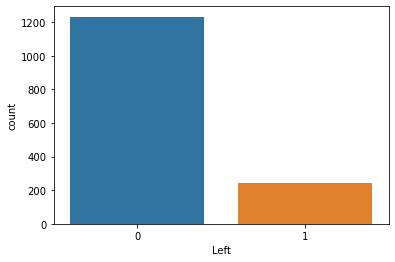

In [27]:
sns.countplot(x='Left',data=df)

<AxesSubplot:>

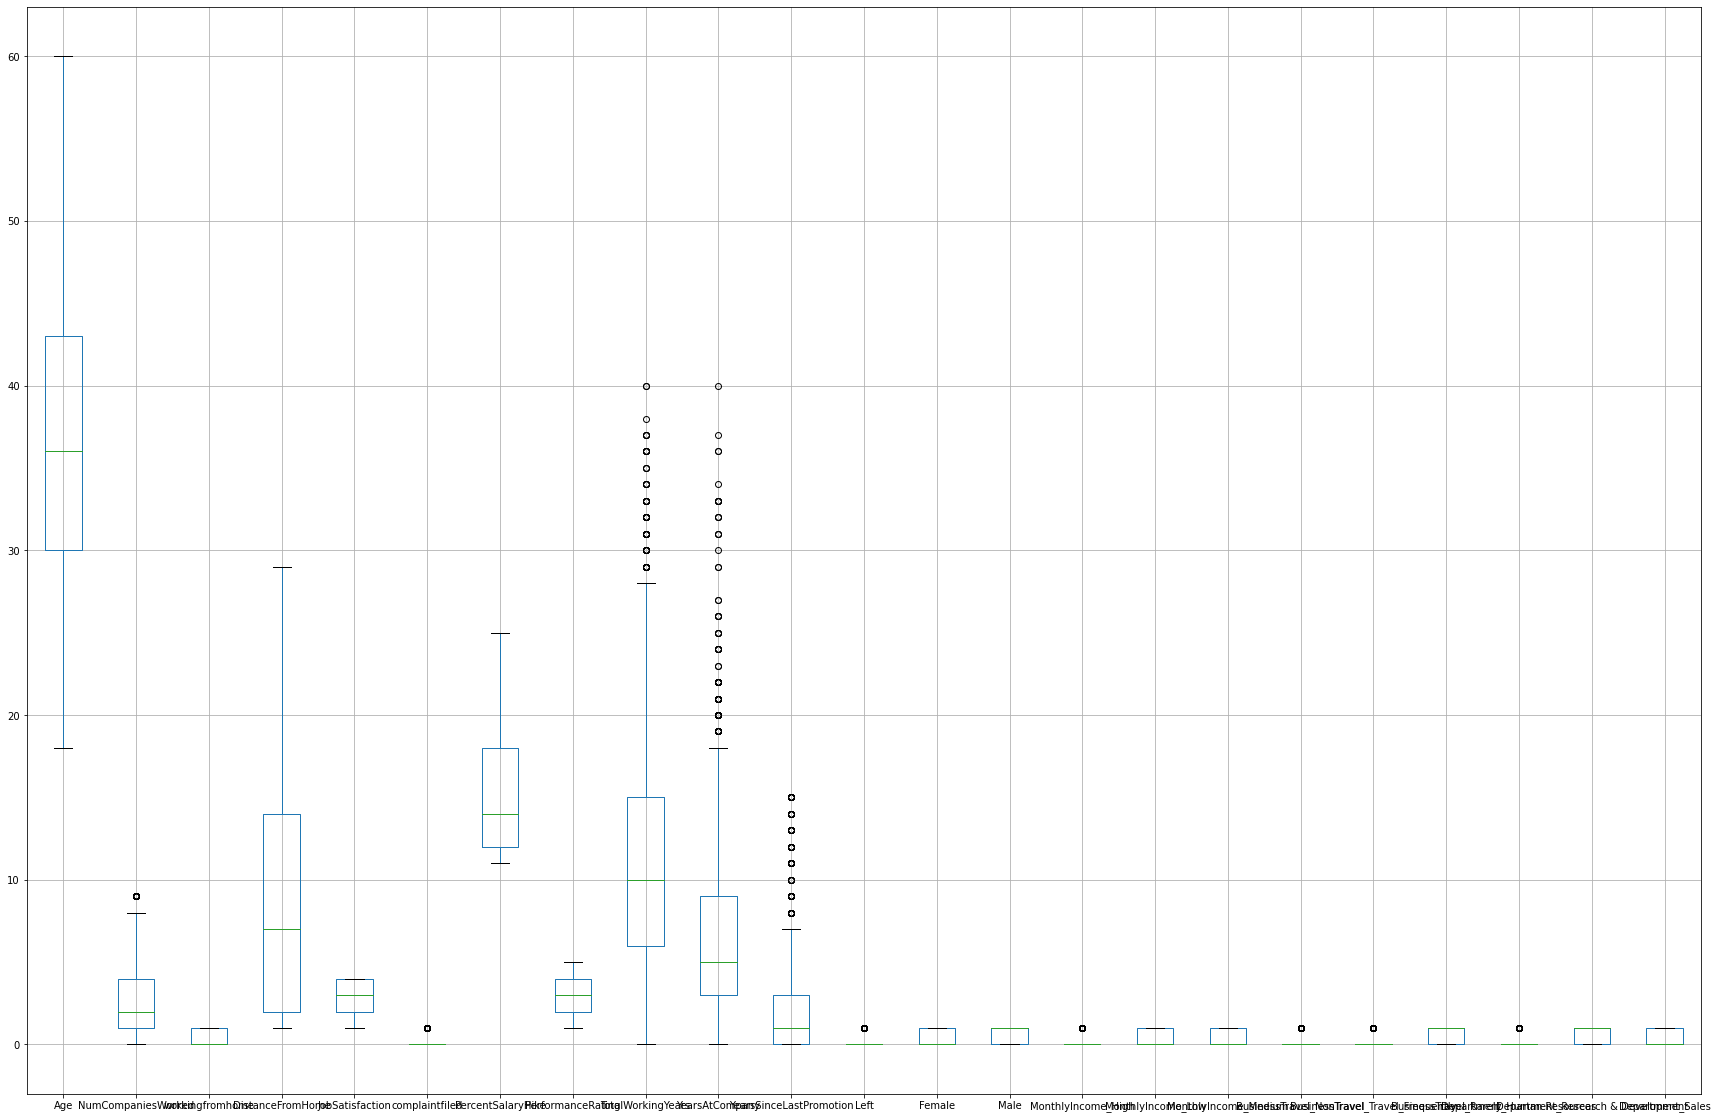

In [28]:
plt.figure(figsize = (30,20))
df.boxplot()

<AxesSubplot:xlabel='TotalWorkingYears'>

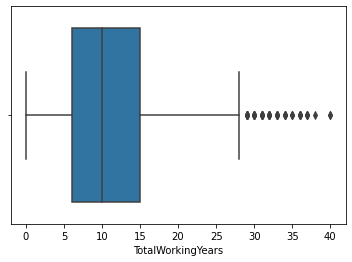

In [29]:
sns.boxplot(df['TotalWorkingYears'])

In [30]:
df.columns

Index(['Age', 'NumCompaniesWorked', 'workingfromhome', 'DistanceFromHome',
       'JobSatisfaction', 'complaintfiled', 'PercentSalaryHike',
       'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'Left', 'Female', 'Male',
       'MonthlyIncome_High', 'MonthlyIncome_Low', 'MonthlyIncome_Medium',
       'BusinessTravel_NonTravel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales'],
      dtype='object')

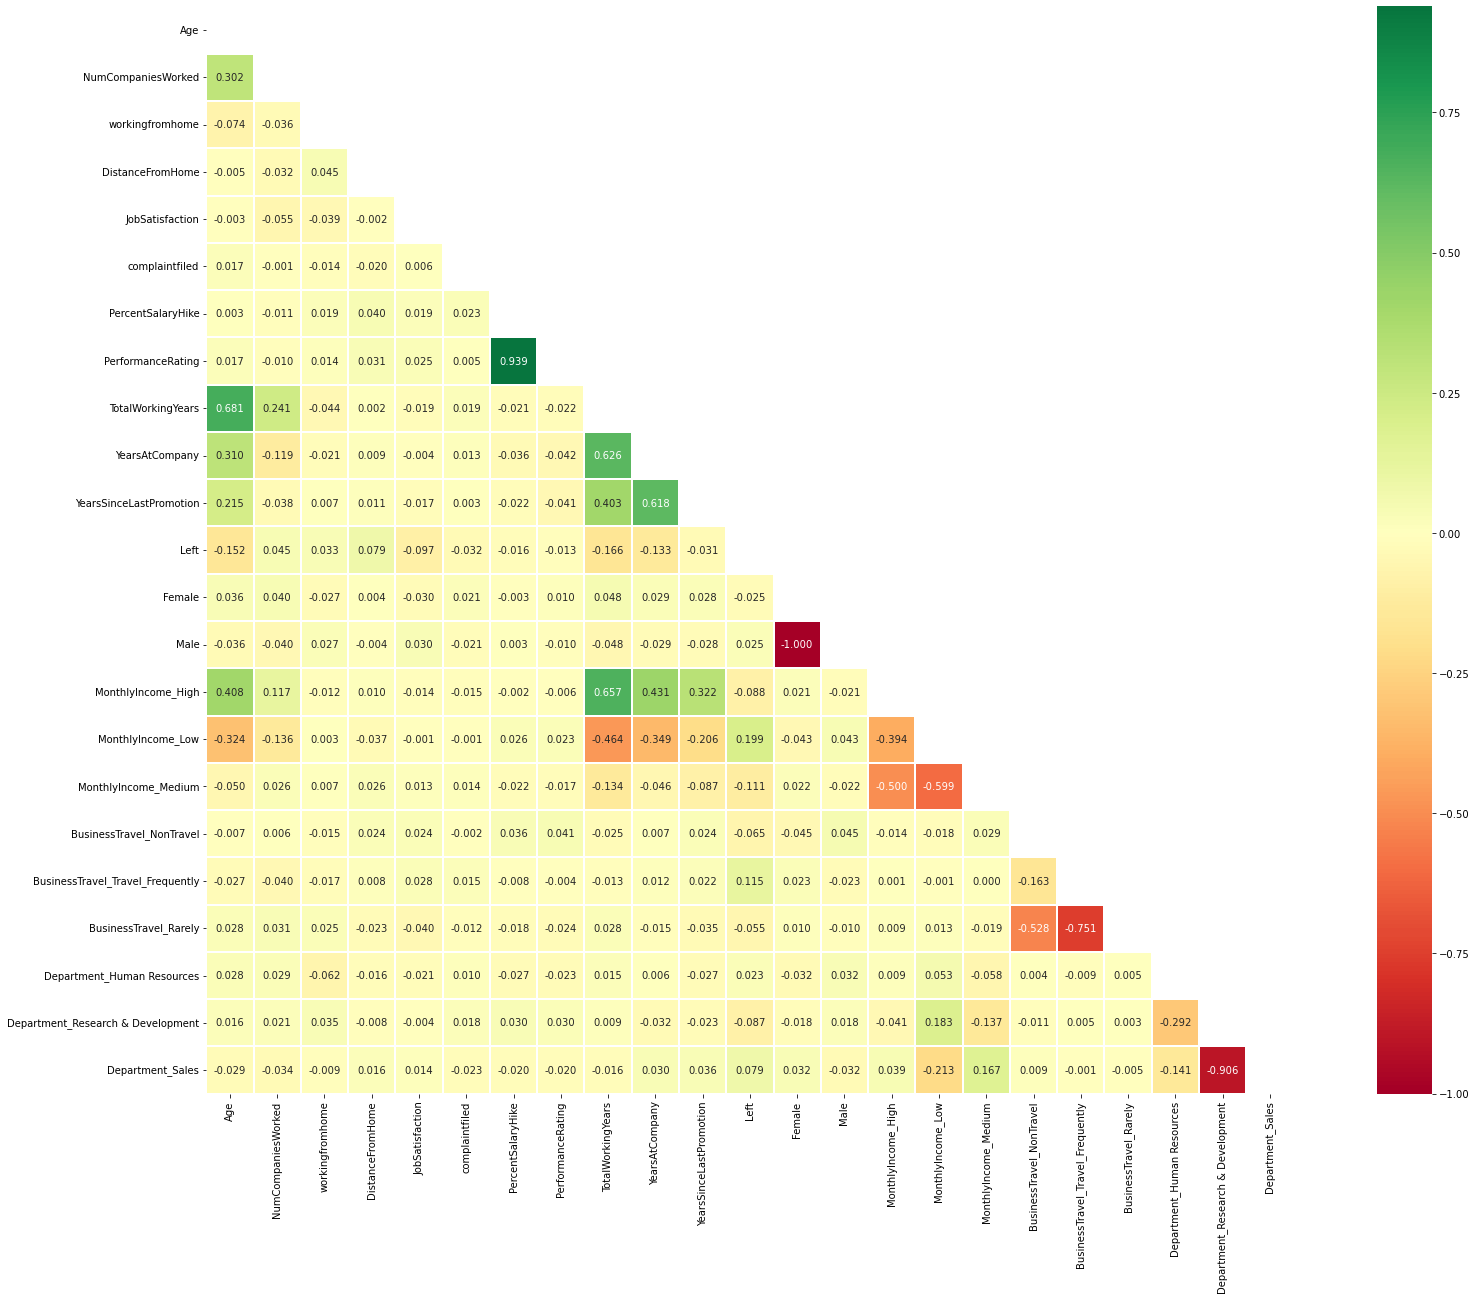

In [31]:
#  creating the heatmap using the seaborn library. The df.corr() function computes the correlation matrix of the dataframe,
fig =  plt.figure(figsize = (30,20))
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),center = 0, fmt = ".3f", square = True, annot= True, Linewidth = .3, mask=mask,cmap='RdYlGn');

<AxesSubplot:>

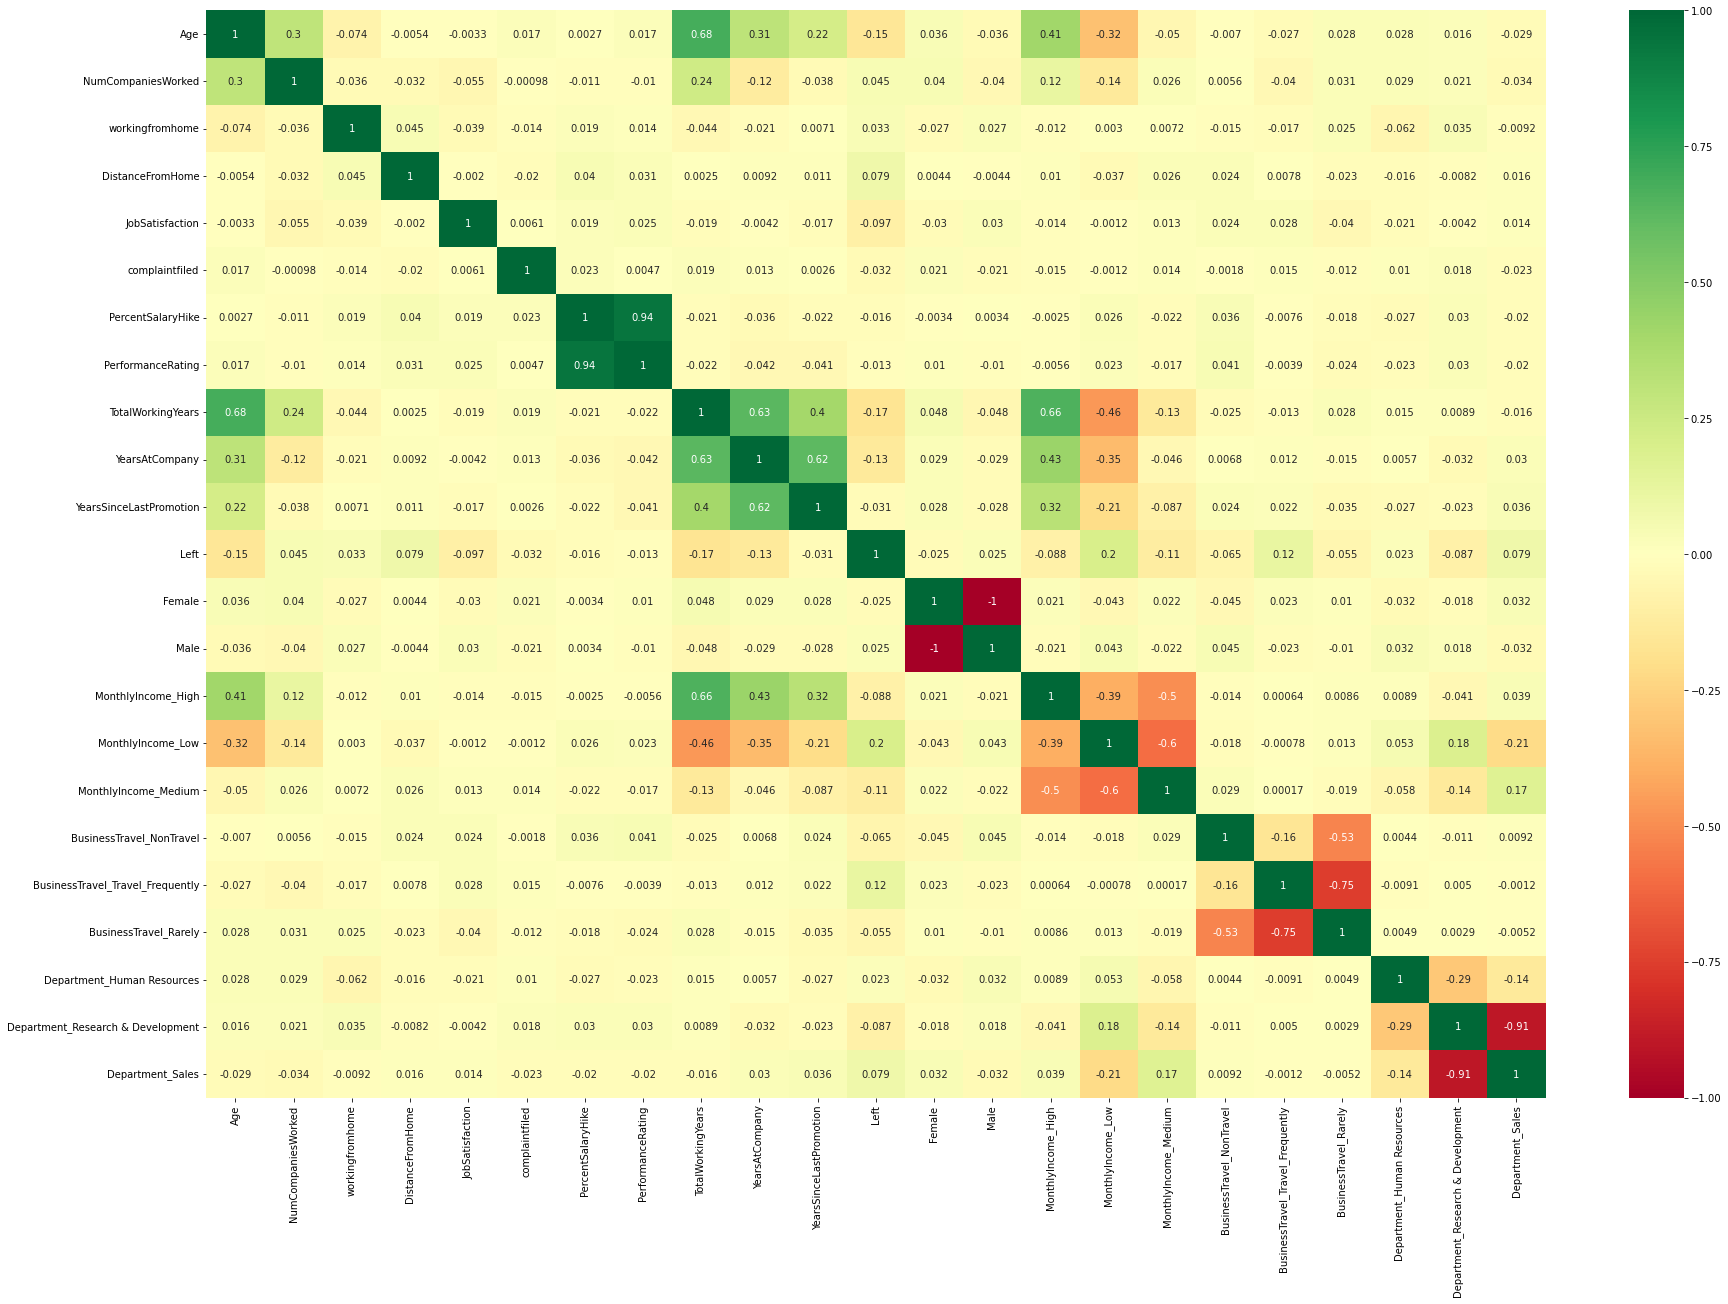

In [32]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
# corr.style.background_gradient(cmap='coolwarm')

In [33]:
df.corr()

,Age,NumCompaniesWorked,workingfromhome,DistanceFromHome,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,...,Male,MonthlyIncome_High,MonthlyIncome_Low,MonthlyIncome_Medium,BusinessTravel_NonTravel,BusinessTravel_Travel_Frequently,BusinessTravel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales
Age,1.000000,0.302426,-0.074278,-0.005417,-0.003346,0.017285,0.002710,0.017364,0.681121,0.310197,...,-0.036380,0.408316,-0.324006,-0.050456,-0.006984,-0.026861,0.027789,0.027837,0.016346,-0.029265
NumCompaniesWorked,0.302426,1.000000,-0.035951,-0.032112,-0.054547,-0.000980,-0.010616,-0.010258,0.240854,-0.119292,...,-0.039878,0.117044,-0.135968,0.026152,0.005622,-0.040451,0.031051,0.028620,0.020721,-0.034142
workingfromhome,-0.074278,-0.035951,1.000000,0.044875,-0.038537,-0.014434,0.019045,0.014364,-0.044425,-0.021132,...,0.027344,-0.011524,0.003026,0.007190,-0.015228,-0.017163,0.024959,-0.061625,0.035238,-0.009160
DistanceFromHome,-0.005417,-0.032112,0.044875,1.000000,-0.001953,-0.019847,0.039590,0.030732,0.002483,0.009230,...,-0.004388,0.010064,-0.037020,0.026121,0.024356,0.007773,-0.022985,-0.015924,-0.008211,0.015561
JobSatisfaction,-0.003346,-0.054547,-0.038537,-0.001953,1.000000,0.006137,0.018878,0.024618,-0.018559,-0.004174,...,0.030416,-0.014171,-0.001220,0.013500,0.023949,0.027822,-0.039966,-0.020550,-0.004246,0.013507
complaintfiled,0.017285,-0.000980,-0.014434,-0.019847,0.006137,1.000000,0.022650,0.004730,0.019072,0.013154,...,-0.021204,-0.014954,-0.001248,0.014209,-0.001773,0.015411,-0.012077,0.010286,0.017561,-0.022743
PercentSalaryHike,0.002710,-0.010616,0.019045,0.039590,0.018878,0.022650,1.000000,0.938976,-0.021006,-0.035965,...,0.003441,-0.002487,0.025879,-0.022225,0.035921,-0.007571,-0.017517,-0.026513,0.030301,-0.019617
PerformanceRating,0.017364,-0.010258,0.014364,0.030732,0.024618,0.004730,0.938976,1.000000,-0.021731,-0.042119,...,-0.010076,-0.005564,0.022828,-0.016668,0.040820,-0.003925,-0.023932,-0.023206,0.029691,-0.020452
TotalWorkingYears,0.681121,0.240854,-0.044425,0.002483,-0.018559,0.019072,-0.021006,-0.021731,1.000000,0.625669,...,-0.048197,0.656666,-0.464495,-0.134474,-0.025004,-0.013349,0.028217,0.015129,0.008924,-0.015947
YearsAtCompany,0.310197,-0.119292,-0.021132,0.009230,-0.004174,0.013154,-0.035965,-0.042119,0.625669,1.000000,...,-0.028684,0.430977,-0.349419,-0.046252,0.006803,0.012343,-0.015174,0.005677,-0.031566,0.030165


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1474 entries, 0 to 1473
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1474 non-null   int64
 1   NumCompaniesWorked                 1474 non-null   int64
 2   workingfromhome                    1474 non-null   int64
 3   DistanceFromHome                   1474 non-null   int64
 4   JobSatisfaction                    1474 non-null   int64
 5   complaintfiled                     1474 non-null   int64
 6   PercentSalaryHike                  1474 non-null   int64
 7   PerformanceRating                  1474 non-null   int64
 8   TotalWorkingYears                  1474 non-null   int64
 9   YearsAtCompany                     1474 non-null   int64
 10  YearsSinceLastPromotion            1474 non-null   int64
 11  Left                               1474 non-null   int32
 12  Female              

In [35]:
df['Left'].head()

0    0
1    0
2    0
3    0
4    0
Name: Left, dtype: int32

In [36]:
y = df['Left']
x = df.drop('Left',axis=1)

In [37]:
x.head()

,Age,NumCompaniesWorked,workingfromhome,DistanceFromHome,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,...,Male,MonthlyIncome_High,MonthlyIncome_Low,MonthlyIncome_Medium,BusinessTravel_NonTravel,BusinessTravel_Travel_Frequently,BusinessTravel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales
0,31,1,0,2,4,1,11,1,1,1,...,0,0,1,0,0,0,1,0,1,0
1,32,0,0,2,4,0,13,2,8,7,...,1,0,1,0,0,1,0,0,1,0
2,34,3,1,8,1,0,14,3,7,0,...,0,0,0,1,0,0,1,0,1,0
3,49,4,0,1,3,0,14,3,23,8,...,1,1,0,0,0,0,1,0,1,0
4,27,1,0,19,1,0,11,1,7,7,...,1,0,0,1,0,0,1,0,1,0


### Splitting data - Train test split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [39]:
x_train.head()

,Age,NumCompaniesWorked,workingfromhome,DistanceFromHome,JobSatisfaction,complaintfiled,PercentSalaryHike,PerformanceRating,TotalWorkingYears,YearsAtCompany,...,Male,MonthlyIncome_High,MonthlyIncome_Low,MonthlyIncome_Medium,BusinessTravel_NonTravel,BusinessTravel_Travel_Frequently,BusinessTravel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales
640,45,0,0,2,2,0,19,5,9,8,...,1,0,0,1,0,0,1,0,0,1
319,36,8,0,5,2,0,16,3,16,13,...,1,0,0,1,0,0,1,0,1,0
655,35,1,0,1,1,0,19,5,3,3,...,1,0,1,0,0,0,1,0,1,0
829,20,1,0,6,4,0,18,4,1,1,...,0,0,1,0,0,1,0,0,1,0
161,41,6,0,4,2,1,19,5,10,3,...,1,0,0,1,1,0,0,1,0,0


### Model Development

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
lr  = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [42]:
LogisticRegression(C=0.1,random_state=42,solver='liblinear')

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [43]:
y_pred = lr.predict(x_test)

In [44]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       361
           1       0.91      0.12      0.22        82

    accuracy                           0.84       443
   macro avg       0.87      0.56      0.56       443
weighted avg       0.85      0.84      0.78       443



In [45]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[360,   1],
       [ 72,  10]], dtype=int64)

In [46]:
rfc = RandomForestClassifier(n_estimators=300,max_features=0.3,max_depth=4,min_samples_leaf=2)
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, max_features=0.3, min_samples_leaf=2,
                       n_estimators=300)

In [47]:
y_pred_rfc=rfc.predict(x_test)

In [48]:
cr_rfc = classification_report(y_test,y_pred)
print(cr_rfc)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       361
           1       0.91      0.12      0.22        82

    accuracy                           0.84       443
   macro avg       0.87      0.56      0.56       443
weighted avg       0.85      0.84      0.78       443



In [49]:
cfm_rf= confusion_matrix(y_test,y_pred)
cfm_rf

array([[360,   1],
       [ 72,  10]], dtype=int64)

In [50]:
dt = DecisionTreeClassifier(random_state=0, max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [51]:
y_pred_dt = dt.predict(x_test)

In [52]:
cr_dt = classification_report(y_test,y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       361
           1       0.42      0.17      0.24        82

    accuracy                           0.80       443
   macro avg       0.63      0.56      0.57       443
weighted avg       0.76      0.80      0.77       443



In [53]:
cfm_dt = confusion_matrix(y_test,y_pred_dt)
print(cfm_dt)

[[342  19]
 [ 68  14]]


In [61]:
# Creating an instance of Logistic regression, decision tree and random classifier
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rm = RandomForestClassifier()

In [63]:
#Training three different models and testing it on the test data.
#The zip function is used to iterate over two lists in parallel: [dt,rm,lr] and 
# ['Decision Tree','Random Forest','Logistic Regression']. 
# The loop assigns each model to the variable a, and its corresponding name to the variable b.
for a,b in zip([dt,rm,lr],['Decision Tree','Random Forest','Logistic Regression']):
    a.fit(x_train,y_train)
    prediction=a.predict(x_train)
    y_pred=a.predict(x_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Decision Tree] training data accuracy is : 1.000000
[Decision Tree] test data accuracy is : 0.720090
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.812641
[Logistic Regression] training data accuracy is : 0.851600
[Logistic Regression] test data accuracy is : 0.835214


In [64]:
# The confusion_matrix function is used to compute the confusion matrix for the model's predictions on the test data 
# y_test compared to the true labels y_pred. 
# The confusion matrix is a table that summarizes the number of true positive, true negative, 
# false positive, and false negative predictions made by the model. #
# The resulting confusion matrix is assigned to the variable cfm
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[360,   1],
       [ 72,  10]], dtype=int64)

In [65]:
# The classification_report function is used to compute a report that summarizes various evaluation 
# metrics for the model's predictions on the test data y_test compared to the true labels y_pred. 
# The report includes metrics such as precision, recall, F1 score, and support (i.e., the number of samples in each class).
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       361
           1       0.91      0.12      0.22        82

    accuracy                           0.84       443
   macro avg       0.87      0.56      0.56       443
weighted avg       0.85      0.84      0.78       443



In [66]:
(353+8)/(353+8+74+8)

0.8148984198645598

### Different Model Scores (accuracy)

In [67]:
model_scores={'Logistic Regression':lr.score(x_test,y_test),
             'Random forest':rm.score(x_test,y_test),
              'Decision tree':dt.score(x_test,y_test),
             }

In [68]:
model_scores

{'Logistic Regression': 0.835214446952596,
 'Random forest': 0.8126410835214447,
 'Decision tree': 0.7200902934537246}

### Model comparision

In [69]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,Random forest,Decision tree
accuracy,0.835214,0.812641,0.72009


<AxesSubplot:>

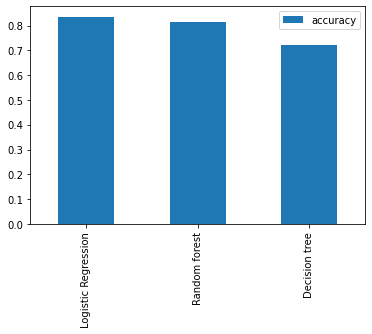

In [70]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

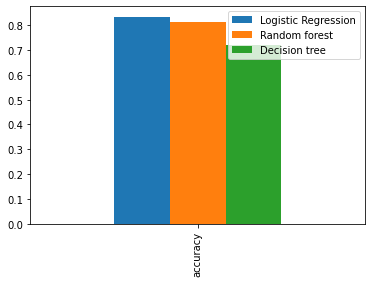

In [76]:
model_compare.plot(kind='bar'); 

### Feature Importance

In [85]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable
# Logistic regression

feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

{'Age': -0.038825370325132634,
 'NumCompaniesWorked': 0.14306586737033497,
 'workingfromhome': 0.10309361525142136,
 'DistanceFromHome': 0.031714987409084926,
 'JobSatisfaction': -0.32565273168959913,
 'complaintfiled': -0.16057770612054054,
 'PercentSalaryHike': 0.0027718264480678548,
 'PerformanceRating': -0.041751890266903666,
 'TotalWorkingYears': -0.016366579130457512,
 'YearsAtCompany': -0.06496025700116084,
 'YearsSinceLastPromotion': 0.10885613740896023,
 'Left': -0.025278730513960155,
 'Female': 0.15054700545780597,
 'Male': -0.03338966636673161,
 'MonthlyIncome_High': 0.5795467273749093,
 'MonthlyIncome_Low': -0.4208887860643348,
 'MonthlyIncome_Medium': -0.4257678997143821,
 'BusinessTravel_NonTravel': 0.6290722958400898,
 'BusinessTravel_Travel_Frequently': -0.0780361211818541,
 'BusinessTravel_Rarely': 0.18343962885254247,
 'Department_Human Resources': -0.4389037251390248,
 'Department_Research & Development': 0.380732371230327}

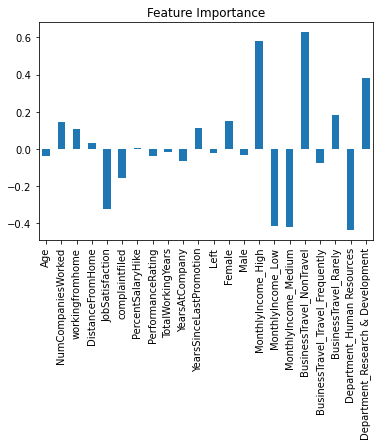

In [86]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance");

In [87]:
# Logistic Regression model because it has best accuracy as well it is neither overfitted nor underfitted

model = lr.fit(x_train,y_train)

import pickle
# save the model to disk
filename = 'finalized_model.pickle'
pickle.dump(model, open(filename, 'wb'))